#### We first import the data and calulate the sample mean and variance 
Calculating the sample mean and sample variance of the data using the following definitions:
$$ \text{Sample Mean: } = \bar{y} = \frac{1}{n} \cdot \sum_{i=1}^n y_i$$
$$ \text{Sample Variance: } = s^2 = \frac{1}{n-1} \sum_{i=1}^n (y_i - \bar{y})^2 $$

In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

#Load the data
data = np.loadtxt('windshieldy1.txt', usecols=0, delimiter=" ")

n = data.size
print('sample size: n =', n)
sample_mean = np.mean(data)
print('sample mean =', sample_mean)
sample_variance = np.var(data,ddof=1)
print('sample variance',sample_variance)


sample size: n = 9
sample mean = 14.611222222222223
sample variance 2.173152944444444


#### Prior
The prior of the multivariate model is for 2 parameters $\mu$ and $\sigma^2$ is given by a non-informative prior:
$$ p(\mu,\sigma^2) \propto \sigma^-2 $$

#### Likelihood 
The likelihood of the data is given by taking the product of many individual events occurring, it can be derived as:
$$ y_i \mid \mu, \sigma^2 \sim N(\mu,\sigma^2) $$
$$ p( y_i \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi}\sigma} exp\left( -\frac{1}{2\sigma^2} \cdot (y_i - \mu)^2 \right) $$
Therefore the likelihood for n observations is 
$$ p( y \mid \mu, \sigma^2) = \prod_{i=1}^n p(y_i\mid \mu, \sigma^2) $$
$$\textbf{likelihood: } \quad p(y \mid \mu, \sigma^2) \propto \frac{1}{\sigma^n} exp\left( -\frac{1}{2\sigma^2} \cdot \sum_{i=1}^n (y_i - \mu)^2 \right)$$ 

#### Marginal Posterior of $\mu$

The closed form of the Marginal Posterior distribution of $\mu$ is  <br>
$$ \textbf{Marginal Posterior:}\quad  p(\mu \mid y) = t_{n-1}(\mu \mid \bar{y}, s^2/n)$$ <br>
Where $t_{n-1}$ is a standard $Student-t$ distribution with $n-1$ degrees of freedom


###  1 a)
Find the **marginal posterior density of $\mu$**, **mean** and the **95% Confidence interval** in the **output cell below** 

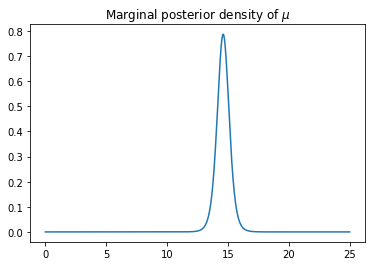

In [2]:
#Define X
x = np.linspace(0,25,1000)
posterior_pdf = scipy.stats.t.pdf(x, df=n-1, loc=sample_mean, 
                                  scale=np.sqrt(sample_variance/n))
plt.plot(x, posterior_pdf)
plt.title('Marginal posterior density of $\mu$')
plt.show()

In [3]:
#point estimate
posterior_mean = scipy.stats.t.mean(df=n-1, loc=sample_mean,
                                    scale=np.sqrt(sample_variance/n))
#95% central interval
post_95_interval = scipy.stats.t.interval(0.95,df=n-1, loc=sample_mean,
                                          scale=np.sqrt(sample_variance/n))

print('point estimate for mu= ', posterior_mean)
print('interval estimate for mu', post_95_interval)

point estimate for mu=  14.611222222222223
interval estimate for mu (13.478081171149812, 15.744363273294633)


In, Conclusion we see no difference in the sample mean and the point estimate of mu, as we used non-informative prior.

### 1 b)

The probability of the next item $\tilde{y}$ is given by the posterior predictive distribution is also given as a t distribution <br>

$$ p(\tilde{y} \mid y) = t_{n-1}\left(\tilde{y} \mid \bar{y},\left(1+\frac{1}{n}\right)s^2\right) $$


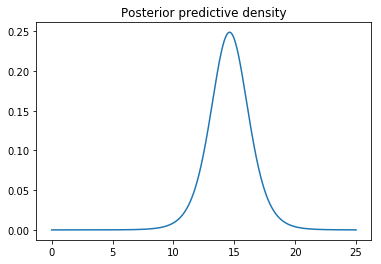

Post predictive point estimate = 14.611222222222223
Post predictive interval estimate= (11.027915590596221, 18.194528853848226)


In [4]:
post_pred_pdf =scipy.stats.t.pdf(x,n-1,sample_mean,np.sqrt(sample_variance*(1+(1/n))))
plt.plot(x, post_pred_pdf)
plt.title('Posterior predictive density')
plt.show()

pos_ped_mean=scipy.stats.t.mean(n-1,sample_mean,
                                np.sqrt(sample_variance*(1+(1/n))))
pos_ped_int=scipy.stats.t.interval(0.95,n-1,sample_mean,
                                   np.sqrt(sample_variance*(1+(1/n))))
print('Post predictive point estimate =',pos_ped_mean)
print('Post predictive interval estimate=',pos_ped_int)

In conclusion with respect to the hardness of the next coming windshield, we see that the mean remains the same, but the interval estimate has increased.

## 2. Inference for difference between proportions
### 2 a)
The control group:

- The sample size $n_0 = 674$

- The number of successes $y_0 = 39$


The treatment group:

- The sample size $n_1 = 680$

- The number of successes $y_1 = 22$


Let us choose as non-informative prior distribution the uniform prior distribution $Beta(1,1)$ on $(p_{0}, p_{1})$.

So we have the priors:

- $p(p_{0}) = Beta(\alpha_{0} = 1, \beta_{0} = 1)$

- $p(p_{1}) = Beta(\alpha_{1} = 1, \beta_{1} = 1)$

and the posterior distributions:

- $p(p_{0}|y) = Beta(p_{0}|\alpha_{0} + y_{0}, \beta_{0} + n_{0} - y_{0})$

- $p(p_{1}|y) = Beta(p_{1}|\alpha_{1} + y_{1}, \beta_{1} + n_{1} - y_{1})$


Let us draw random samples from posterior distributions of $p_{0}$ and $p_{1}$, and use these samples to calculate the odds ratio $(p_{1}/(1-p_{1}))/(p_{0}/(1-p_{0}))$. For the odds ratio, we compute the point and interval estimates and plot the histogram.

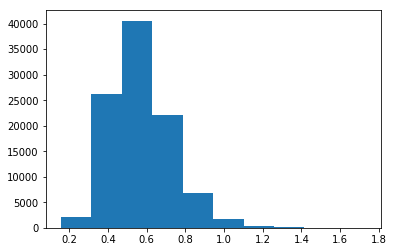

point estimate for odds = 0.5699900688097185
central 95% interval for odds = [0.3220875568067054, 0.9237354009071506]


In [5]:
n0 = 674
y0 = 39
a0 = 1
b0 = 1

n1 = 680
y1 = 22
a1 = 1
b1 = 1

#Taking random sample size as 100000

post_0_sample=scipy.stats.beta.rvs(a0+y0,b0+n0-y0,size=100000)
post_1_sample=scipy.stats.beta.rvs(a1+y1,b1+n1-y1,size=100000)
odds=((post_1_sample/(1-post_1_sample)))/(post_0_sample/(1-post_0_sample))

plt.hist(odds)
plt.show()

odds_size = odds.size
#print(odds_size)
odds_sorted = np.sort(odds)
lower_index = int(odds_size*0.025)
upper_index = int(odds_size*0.975)
odds_mean = np.mean(odds)
odds_interval = [odds_sorted[lower_index], odds_sorted[upper_index]]

print('point estimate for odds =', odds_mean)
print('central 95% interval for odds =', odds_interval)

### 2 b)
Taking alpha=10 and beta=2, to perform a sensitivity analysis of priors

In [6]:
a0,b0,a1,b1=10,2,10,2
post_0_sample=scipy.stats.beta.rvs(a0+y0,b0+n0-y0,size=100000)
post_1_sample=scipy.stats.beta.rvs(a1+y1,b1+n1-y1,size=100000)

#Formulae for odds
odds=((post_1_sample/(1-post_1_sample)))/(post_0_sample/(1-post_0_sample))

odds_size = odds.size
#print(odds_size)
odds_sorted = np.sort(odds)
lower_index = int(odds_size*0.025)
upper_index = int(odds_size*0.975)
odds_mean = np.mean(odds)
odds_interval = [odds_sorted[lower_index], odds_sorted[upper_index]]

print('point estimate for odds =', odds_mean)
print('central 95% interval for odds =', odds_interval)

point estimate for odds = 0.6451028233050041
central 95% interval for odds = [0.3947901920408184, 0.991038508036016]


In Conclusion we only see a very slight difference between the point and interval estimates, which signify that our odds is not very sensitive to the priors when alpha and beta values dont vary much, but if alpha and beta values are very dissimilar then the odds will tend towards one, as the values of alpha and beta affect the odds ratio.

### 3) Inference for difference between normal means
#### 3 a)
We use the same definitions as we have used in problem 1

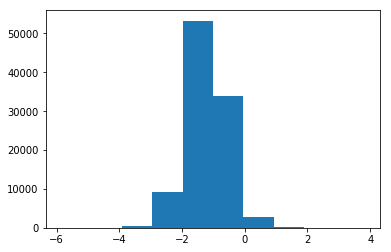

Mean(POINT) of the mu_d -1.2101429162460027
interval estimate of mu_d [-2.43957385  0.01869518]


In [7]:
data2 = np.loadtxt('windshieldy2.txt', usecols=0, delimiter=" ")
n2=data2.size
sample_mean2=np.mean(data2)
sample_variance2=np.var(data2)
# random sample size is 100000
u1 = scipy.stats.t.rvs(df=n-1, loc=sample_mean,
                       scale=np.sqrt(sample_variance/n),size=100000)

u2 = scipy.stats.t.rvs(df=n2-1, loc=sample_mean2,
                       scale=np.sqrt(sample_variance2/n2),size=100000)

dist=u1-u2

plt.hist(dist)
plt.show()

print("Mean(POINT) of the mu_d",np.mean(dist))
print("interval estimate of mu_d",np.percentile(dist,[2.5,97.5]))

Conclusion,
values of $\mu_{d}$ are mostly negative, which we can infer from the point estimate and the interval estimate mentioned above

#### 3 b)
The means are not the same, this is due to the fact that the value of $\mu_{d}$ is negative, if the means were similar or same, the value we would get is zero or close to zero, in our case $\mu_{d}$ is negative which signifies the mean value $\mu_{2}$ is higher when compared to the mean value $\mu_{1}$